In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

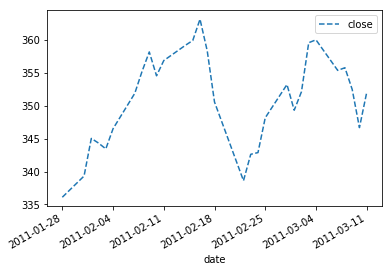

In [7]:
data = pd.read_csv('aapl.csv',header=None,usecols=[1,6],names=['date','close'])

def dmy2ymd(item):
    return '-'.join(item.split('-')[::-1])

data['date']=pd.to_datetime(data['date'].apply(dmy2ymd))
data.plot(x='date',y='close',linestyle='--')

In [9]:
data['x']=(data['date']-pd.to_datetime('20110101')).dt.days
data

,date,close,x
0,2011-01-28,336.10,27
1,2011-01-31,339.32,30
2,2011-02-01,345.03,31
3,2011-02-02,344.32,32
4,2011-02-03,343.44,33
5,2011-02-04,346.50,34
6,2011-02-07,351.88,37
7,2011-02-08,355.20,38
8,2011-02-09,358.16,39
9,2011-02-10,354.54,40


In [12]:
#实现线性拟合:np.linalg.lstsq(A,B) 先整理A与B
A=pd.DataFrame({'x':data['x'],'1':np.ones(30)})
B=data['close']
x=np.linalg.lstsq(A,B)[0]
x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([1.75245535e-01, 3.42503209e+02])

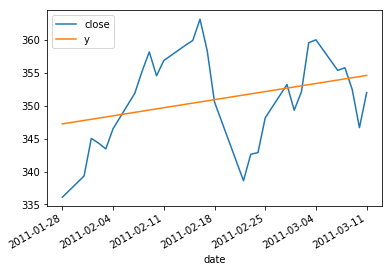

In [14]:
data['y']=x[0]*data['x']+x[1]
data.plot(x='date',y=['close','y'])

In [15]:
#多项式拟合
p=np.polyfit(data['x'],data['close'],5)
p

array([-1.97919911e-05,  4.66447608e-03, -4.27249275e-01,  1.89446747e+01,
       -4.05027302e+02,  3.67749979e+03])

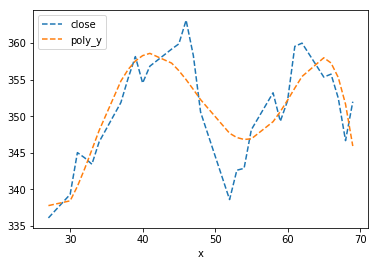

In [16]:
data['poly_y']=np.polyval(p,data['x'])
data.plot(x='x',y=['close','poly_y'],linestyle='--')